In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Variables necesarias previas a los ejercicios

In [2]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

(512, 512)


TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

maxfil (píxeles blancos): 0.4296875
Umbral: 0.38671875 píxeles
Fila 6: 0.396484375 píxeles blancos
Fila 12: 0.4296875 píxeles blancos
Fila 15: 0.3984375 píxeles blancos
Fila 20: 0.390625 píxeles blancos
Fila 21: 0.392578125 píxeles blancos
Fila 88: 0.388671875 píxeles blancos
Fila 100: 0.4140625 píxeles blancos


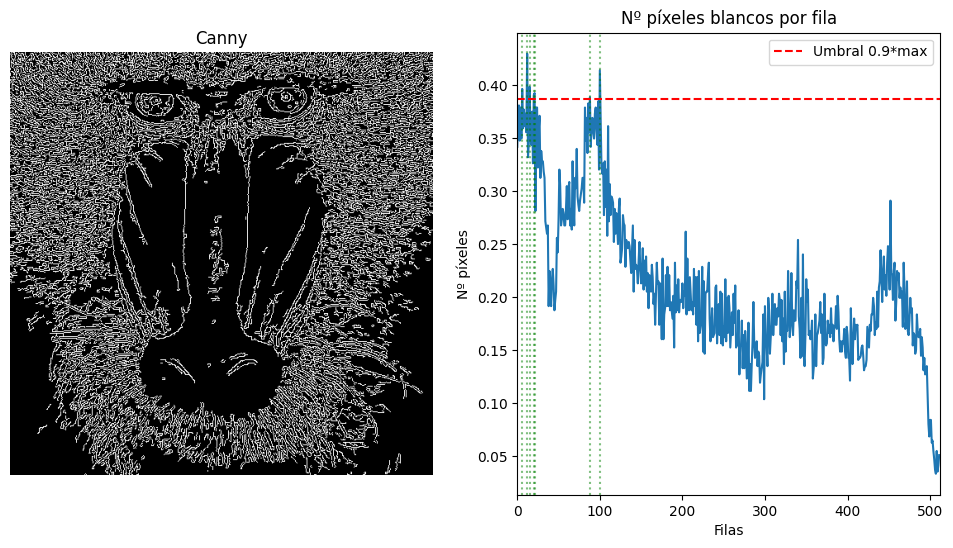

In [3]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)
# print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
rows_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = rows_counts[:, 0] / (255 * canny.shape[1])

maxfil = rows.max() # máximo nº de píxeles blancos en una fila
print(f"maxfil (píxeles blancos): {maxfil}")

limite = 0.9 * maxfil # definimos el umbral
print(f"Umbral: {limite} píxeles")

for i, val in enumerate(rows): # buscamos filas que superen o igualen el umbral
    if val >= limite:
        print(f"Fila {i}: {val} píxeles blancos")
filas_significativas = [i for i, val in enumerate(rows) if val >= limite]

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(12,6)) # aumento del ancho para visualizar mejor la gráfica
# Imagen Canny
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 
# Gráfica de la cantidad de píxeles blancos
plt.subplot(1, 2, 2)
plt.title("Nº píxeles blancos por fila")
plt.xlabel("Filas")
plt.ylabel("Nº píxeles")
plt.plot(rows)

# línea del umbral
plt.axhline(y=limite, color='r', linestyle='--', label='Umbral 0.9*max')

# líneas verticales para filas significativas
for f in filas_significativas:
    plt.axvline(x=f, color='g', linestyle=':', alpha=0.5)

plt.xlim([0, canny.shape[0]])
plt.legend()
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

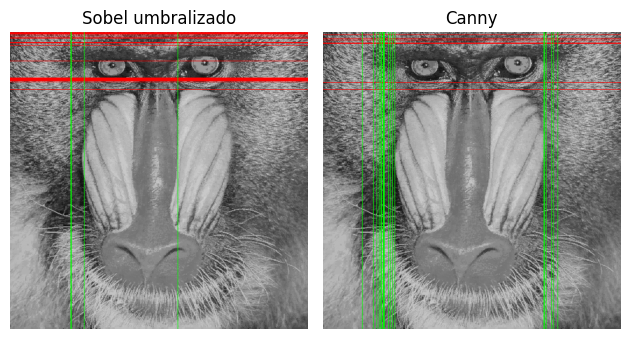

In [4]:
# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)
# Umbralizado Sobel
valor_umbral = 100
# Imagen binaria que resalta los bordes fuertes
_, sobel_umbral = cv2.threshold(sobel8, valor_umbral, 255, cv2.THRESH_BINARY)

# Conteo píxeles distintos de 0 en filas y columnas Sobel
conteo_filas_sobel = np.count_nonzero(sobel_umbral, axis=1) # conteo filas
conteo_columnas_sobel = np.count_nonzero(sobel_umbral, axis=0) # conteo columnas
max_filas_sobel = conteo_filas_sobel.max() # valor máximo de filas
max_columnas_sobel = conteo_columnas_sobel.max() # valor máximo de columnas
filas_sobel = np.where(conteo_filas_sobel >= 0.9*max_filas_sobel)[0] # lista de filas que cumplen el umbral
columnas_sobel = np.where(conteo_columnas_sobel >= 0.9*max_columnas_sobel)[0] # lista de columnas que cumplen el umbral

# Conteo píxeles distintos de 0 en filas y columnas Canny
edges_canny = cv2.Canny(gris, 100, 200) # detector de bordes
conteo_filas_canny = np.count_nonzero(edges_canny, axis=1) # conteo filas
conteo_columnas_canny = np.count_nonzero(edges_canny, axis=0) # conteo columnas
max_filas_canny = conteo_filas_canny.max() # valor máximo de filas
max_columnas_canny = conteo_columnas_canny.max() # valor máximo de columnas
filas_canny = np.where(conteo_filas_canny >= 0.9*max_filas_canny)[0] # lista de filas que cumplen el umbral
columnas_canny = np.where(conteo_columnas_canny >= 0.9*max_columnas_canny)[0] # lista de columnas que cumplen el umbral

# Imagen con líneas Sobel
img_sobel_lines = cv2.cvtColor(gris, cv2.COLOR_GRAY2BGR)
for f in filas_sobel: # dibujar líneas en las filas significativas
    cv2.line(img_sobel_lines, (0, f), (img.shape[1], f), (0,0,255), 1)
for c in columnas_sobel: # dibujar líneas en las columans significativas
    cv2.line(img_sobel_lines, (c, 0), (c, img.shape[0]), (0,255,0), 1)

# Imagen con líneas Canny
img_canny_lines = cv2.cvtColor(gris, cv2.COLOR_GRAY2BGR)
for f in filas_canny: # dibujar líneas en las filas significativas
    cv2.line(img_canny_lines, (0, f), (img.shape[1], f), (0,0,255), 1)
for c in columnas_canny: # dibujar líneas en las columnas significativas
    cv2.line(img_canny_lines, (c, 0), (c, img.shape[0]), (0,255,0), 1)

# Mostrar imagen Sobel con líneas
plt.subplot(1,2,1)
plt.title("Sobel umbralizado")
plt.axis("off")
plt.imshow(cv2.cvtColor(img_sobel_lines, cv2.COLOR_BGR2RGB))
# Mostrar imagen Canny con líneas
plt.subplot(1,2,2)
plt.title("Canny")
plt.axis("off")
plt.imshow(cv2.cvtColor(img_canny_lines, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [5]:
import cv2
import numpy as np

# --- funciones auxiliares ---
def sobel_frame(frame, valor_umbral=100):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ggris = cv2.GaussianBlur(gris, (3,3), 0)
    sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
    sobel = np.abs(sobelx) + np.abs(sobely)
    sobel8 = cv2.convertScaleAbs(sobel)
    _, sobel_umbral = cv2.threshold(sobel8, valor_umbral, 255, cv2.THRESH_BINARY)
    return sobel_umbral

def canny_frame(frame, low=100, high=200):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gris, low, high)
    return edges

# --- inicializar webcam y background subtractor ---
vid = cv2.VideoCapture(0)
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# estado global de modos
modo = 0           # modo actual: 0=original, 1=filtro color, 2=Sobel/Canny, 3=fondo
color_idx = 0      # para modo 1 (filtro color)
modo2_view = 0     # 0 = Sobel, 1 = Canny  (sub-modo para modo 2)

print("Teclas: 0=Original, 1=FiltroColor(cicla R/G/B), 2=Sobel/Canny, 3=Substraccion fondo, ESC=Salir")

while True:
    ret, frame = vid.read()
    if not ret:
        break

    key = cv2.waitKey(20) & 0xFF
    if key == 27:  # ESC
        break

    # Manejo de la tecla '2'
    if key == ord('2'):
        if modo == 2:
            # si ya estamos en modo 2, cambiar la vista interna
            modo2_view = (modo2_view + 1) % 2
        else:
            # entrar en modo 2 y arrancar en vista Sobel
            modo = 2
            modo2_view = 0

    # Otras teclas para seleccionar modos directos
    elif key == ord('1'):
        if modo == 1:
            color_idx = (color_idx + 1) % 3
        else:
            modo = 1
            color_idx = 0
    elif key in [ord('0'), ord('3')]:
        modo = int(chr(key))

    # --- MODOS ---
    if modo == 0:
        output = frame.copy()
        label = "ORIGINAL"

    elif modo == 1:
        # filtro de color: solo un canal activo
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        colored = np.zeros_like(frame)
        if color_idx == 0:
            colored[:, :, 2] = gris; label = "FILTRO ROJO"
        elif color_idx == 1:
            colored[:, :, 1] = gris; label = "FILTRO VERDE"
        else:
            colored[:, :, 0] = gris; label = "FILTRO AZUL"
        output = colored

    elif modo == 2:
        # si modo2_view == 0 mostramos Sobel, si ==1 mostramos Canny
        if modo2_view == 0:
            sobel_u = sobel_frame(frame, valor_umbral=100)      # imagen binaria
            output = cv2.cvtColor(sobel_u, cv2.COLOR_GRAY2BGR)
            label = "MODO 2: SOBEL (pulse 2 para Canny)"
        else:
            canny = canny_frame(frame, 100, 200)
            output = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
            label = "MODO 2: CANNY (pulse 2 para Sobel)"

    elif modo == 3:
        # Sustracción de fondo
        mask = eliminadorFondo.apply(frame)  # 0 = fondo, 255 = foreground, 127 = sombras si detectShadows=True
        mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
        shadow_mask = (mask == 127) # máscara booleana, píxeles=127 detectados como true
        mask_bgr[shadow_mask] = (150, 150, 200)  # BGR

        fg_only = cv2.bitwise_and(frame, frame, mask=(mask==255).astype(np.uint8)*255)

        output = mask_bgr.copy()

        # Si quieres ver el foreground sobre el frame, descomenta esta línea:
        output = fg_only
        label = "Modo 3: Sustraccion de fondo"

    # Dibujar la etiqueta y mostrar
    cv2.putText(output, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
    cv2.imshow('Demostrador', output)

# Liberar
vid.release()
cv2.destroyAllWindows()


Teclas: 0=Original, 1=FiltroColor(cicla R/G/B), 2=Sobel/Canny, 3=Substraccion fondo, ESC=Salir


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [6]:
# messa di voce:
cap = cv2.VideoCapture(0)

overlay = None # imagen donde se dibujan las partículas
particles = [] # lista donde se guardan las partículas
PALETTE = [(0,200,255),(255,100,200),(200,255,100),(180,180,255)] # paleta para las partículas

prev = None  # prev se inicializará en la primera iteración

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1) # girar el frame horizontalmente
    h, w = frame.shape[:2]

    if overlay is None:
        overlay = np.zeros_like(frame, dtype=np.uint8) # inicializar la imagen donde se dibujan las partículas

    # convertir a gris y suavizar
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (7,7), 0)

    # inicializar prev en la primera iteración
    if prev is None:
        prev = gray
        continue  # saltamos la primera iteración porque no hay frame previo

    # detectar movimiento
    diff = cv2.absdiff(gray, prev) # calculamos diferencia absoluta entre frame actual y anterior
    _, th = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY) # convertimos diferencias en blanco
    th = cv2.dilate(th, None, iterations=2) # expande regiones blancas

    # generar partículas (círculos) en contornos grandes
    cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # crea contornos que representan objetos
    for c in cnts:
        if cv2.contourArea(c) < 500: # ignorar las áreas que son más pequeñas que 500px^2
            continue
        x, y, wc, hc = cv2.boundingRect(c) # rectángulo que encierra el contorno
        cx, cy = x + wc//2, y + hc//2 # coordenadas del centro de los contornos
        r = max(8, min(60, int(np.sqrt(wc*hc)/2))) # genera radio proporcional al tamaño de contorno
        color = PALETTE[np.random.randint(0, len(PALETTE))] # asigna color a la partícula
        particles.append([cx, cy, r, 1.0, color]) # guarda las partículas con 5 elementos

    # actualizar partículas: crecer, decaer, dibujar con borde
    overlay[:] = (overlay * 0.90).astype(np.uint8) # alicamos decay
    for p in particles[:]:
        p[2] += 0.8       # radio crece
        p[3] -= 0.03      # vida decae
        if p[3] <= 0:
            particles.remove(p)
            continue
        cv2.circle(overlay, (int(p[0]), int(p[1])), int(p[2]), p[4], -1, lineType=cv2.LINE_AA) # círculo relleno
        cv2.circle(overlay, (int(p[0]), int(p[1])), int(p[2]), (0,0,0), 1, lineType=cv2.LINE_AA) # borde del círculo

    # salida final
    out = cv2.addWeighted(frame, 0.6, overlay, 0.8, 0)
    cv2.imshow("Messa di Voce", out)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC para salir
        break

    prev = gray  # actualizar frame previo

cap.release()
cv2.destroyAllWindows()
